In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [6]:
#可以传入自己的文件路径
data = pd.read_csv('data.csv')
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,education,marital,sub_avg_education_level_income,sub_avg_marital_level_MntFishProducts
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,63,2822,1529,1441,0,2,2,6153.991914,132.802935
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,66,2272,21,15,0,2,2,-5640.008086,-37.197065
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,55,2471,734,692,0,2,3,19628.991914,71.801056
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,36,2298,48,43,0,2,3,-25338.008086,-29.198944
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,39,2320,407,392,0,4,1,3072.418067,10.430913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,53,2540,1094,847,0,2,1,9238.991914,6.430913
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,74,2178,436,428,1,4,3,8793.418067,-39.198944
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,39,2314,1217,1193,1,2,0,4996.991914,-3.313043
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,64,2315,782,721,0,3,3,16615.420330,40.801056


 1. AcceptedCmpOverall             0.426961
 2. AcceptedCmp5                   0.324648
 3. AcceptedCmp1                   0.296978
 4. MntTotal                       0.264895
 5. MntRegularProds                0.262363
 6. AcceptedCmp3                   0.253576
 7. MntMeatProducts                0.248821
 8. MntWines                       0.245559
 9. NumCatalogPurchases            0.234524
10. Recency                        0.200413
11. Customer_Days                  0.196520
12. AcceptedCmp4                   0.179727
13. Income                         0.174902
14. AcceptedCmp2                   0.169128
15. sub_avg_education_level_income 0.160487
16. Teenhome                       0.155196
17. NumWebPurchases                0.149699
18. MntGoldProds                   0.140210
19. MntFruits                      0.122331
20. MntSweetProducts               0.115326
21. MntFishProducts                0.107405
22. sub_avg_marital_level_MntFishProducts 0.104534
23. education            

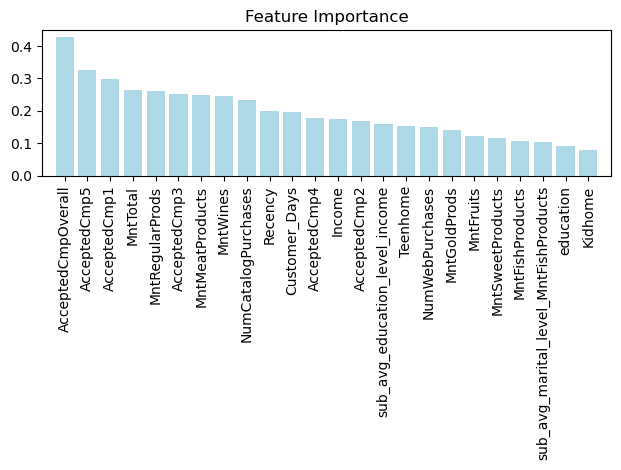

In [7]:
#对特征进行排序
#此代码正在对目标变量（'自变量') 以及DataFrame数据中的所有其他变量，然后选择具有最高绝对相关系数的前25个特征。
#它将目标变量从特征列表中删除，然后按降序打印特征名称及其相关系数。
#然后，代码使用Matplotlib中的条形图方法创建前25个特征及其相关系数的条形图。x轴显示要素名称，y轴显示相关系数。
#结果图提供了特征重要性的视觉表示，并有助于识别目标变量的最相关特征。


features_all = data.corr()['自变量'].abs().sort_values(ascending=False)
features = features_all[:25]
features.drop('自变量', axis=0, inplace=True)
features_index = features.index

for i in range(len(features)):
    print("%2d. %-*s %f" % (i + 1, 30, features_index[i], features[i]))

plt.title('特征重要性')
plt.bar(range(len(features)), features, color='lightblue', align='center')
plt.xticks(range(len(features)), features_index, rotation=90)
plt.xlim([-1, len(features)])
plt.tight_layout()
plt.show()

0.8802776635129576 181


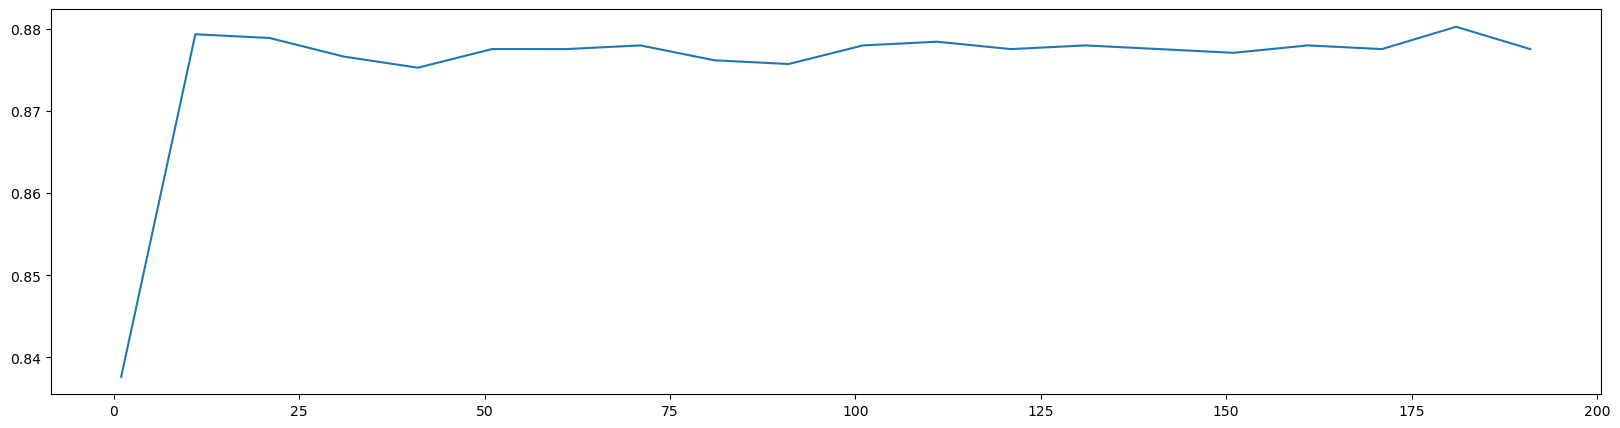

In [11]:
#调参数，找到最优的决策树数量n_estimators，以及最优的准确率
cross = []
for i in range(0,200,10):
    rf = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rf,x3,y3,cv=10).mean()
    cross.append(score)
#该代码使用scikit-learn中的cross_val_score函数对随机森林模型（rf）执行k次交叉验证。
#cross_val_score函数接受以下参数：
#rf：随机森林模型
#x3：特征矩阵
#y3：目标变量
#cv：交叉验证的折叠数
#然后对得到的交叉验证分数数组调用均值方法，以获得所有折叠的平均分数。最后，将平均分数附加到一个名为cross的列表中。
#该代码可用于使用交叉验证来评估随机森林模型的性能，并比较不同模型或特征集的性能。
    

print(max(cross),(cross.index(max(cross))*10)+1)  
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),cross)
plt.show()
#这里显示最优是181


#该代码的第一行打印了随机森林模型中使用的最大交叉验证分数和相应数量的估计量（树）。
#它通过使用max函数在交叉列表（包含交叉验证分数）中找到最大值，然后使用index方法找到该最大值的索引来实现这一点。
#该指数乘以10并增加1，得到随机森林模型中使用的估计量的数量。

#创建了交叉验证分数相对于随机森林模型中使用的估计量数量的折线图。
#它使用Matplotlib中的绘图方法，根据从1到200的值范围以10为增量绘制交叉列表。
#由此产生的图可以帮助可视化估计量的数量和交叉验证分数之间的关系，并可以帮助确定在模型中使用的估计量的最佳数量。

In [21]:
#把调整好的参数n_estimators带入随机森林模型对特征重要性排序。
x_train = data.drop(['Response','MntFruits','Kidhome','education','sub_avg_marital_level_MntFishProducts','MntFishProducts','MntGoldProds','NumWebPurchases','AcceptedCmpOverall'], axis = 1)
y_train = data['Response']
feat_labels = x_train.columns


rf = RandomForestRegressor(n_estimators=181,max_depth=4)
rf_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('standardize', StandardScaler()), ('rf', rf)])
rf_pipe.fit(x_train, y_train)

rf = rf_pipe.__getitem__('rf')
importance = rf.feature_importances_


#代码使用fit（）方法将管道拟合到训练数据x_train和y_train。
#使用RandomForesTReturnsor的feature_importances_属性将特征重要性存储在“importance”变量中。
#特征重要性表示随机森林模型中每个特征的相对重要性。

#np.argsort()
#返回要从最小到最大排序的集合的索引值。[：：-1]实现相反的顺序，即最终imp_result保存从最大到最小的索引值
imp_result = np.argsort(importance)[::-1][:20]

#按重要性降序输出属性列名及其重要性
for i in range(len(imp_result)):
    print("%2d. %-*s %f" % (i + 1, 30, feat_labels[imp_result[i]], importance[imp_result[i]]))

 1. AcceptedCmp5                   0.230619
 2. Customer_Days                  0.156950
 3. Recency                        0.149471
 4. AcceptedCmp3                   0.140702
 5. AcceptedCmp1                   0.088453
 6. MntMeatProducts                0.035690
 7. MntTotal                       0.025299
 8. MntRegularProds                0.024220
 9. Income                         0.022415
10. NumWebVisitsMonth              0.020731
11. Age                            0.017705
12. MntWines                       0.017347
13. NumCatalogPurchases            0.016511
14. sub_avg_education_level_income 0.014739
15. MntSweetProducts               0.010299
16. NumStorePurchases              0.008440
17. NumDealsPurchases              0.005468
18. marital                        0.005453
19. AcceptedCmp4                   0.003771
20. Teenhome                       0.003310
